In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

C:\Users\kulde\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
print(open("Problem_statement(salary_data).txt").read())

1) Prepare a classification model using Naive Bayes 
for salary data 

Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual



In [3]:
train_data = pd.read_csv("SalaryData_Train.csv.crdownload")
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24292,19,Private,Some-college,10.0,Never-married,Sales,Own-child,White,Male,0.0,0.0,15.0,United-States,<=50K
24293,24,Private,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Not-in-family,White,Female,0.0,0.0,40.0,Ecuador,<=50K
24294,28,Private,Masters,14.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
24295,25,Local-gov,Masters,14.0,Never-married,Prof-specialty,Own-child,White,Female,0.0,0.0,40.0,United-States,<=50K


In [4]:
test_data = pd.read_csv("SalaryData_Test.csv")
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [5]:
train_data.shape,test_data.shape

((24297, 14), (15060, 14))

In [6]:
train_data.info(),test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24297 entries, 0 to 24296
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            24297 non-null  int64  
 1   workclass      24297 non-null  object 
 2   education      24296 non-null  object 
 3   educationno    24296 non-null  float64
 4   maritalstatus  24296 non-null  object 
 5   occupation     24296 non-null  object 
 6   relationship   24296 non-null  object 
 7   race           24296 non-null  object 
 8   sex            24296 non-null  object 
 9   capitalgain    24296 non-null  float64
 10  capitalloss    24296 non-null  float64
 11  hoursperweek   24296 non-null  float64
 12  native         24296 non-null  object 
 13  Salary         24296 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column     

(None, None)

In [7]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,24297.0,38.484216,13.184948,17.0,28.0,37.0,47.0,90.0
educationno,24296.0,10.123107,2.539102,1.0,9.0,10.0,13.0,16.0
capitalgain,24296.0,1098.300667,7478.837031,0.0,0.0,0.0,0.0,99999.0
capitalloss,24296.0,87.487076,402.625606,0.0,0.0,0.0,0.0,4356.0
hoursperweek,24296.0,40.902659,11.942403,1.0,40.0,40.0,45.0,99.0


In [8]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,15060.0,38.768327,13.380676,17.0,28.0,37.0,48.0,90.0
educationno,15060.0,10.112749,2.558727,1.0,9.0,10.0,13.0,16.0
capitalgain,15060.0,1120.301594,7703.181842,0.0,0.0,0.0,0.0,99999.0
capitalloss,15060.0,89.041899,406.283245,0.0,0.0,0.0,0.0,3770.0
hoursperweek,15060.0,40.951594,12.062831,1.0,40.0,40.0,45.0,99.0


In [9]:
train_data.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [10]:
train_data.dtypes

age                int64
workclass         object
education         object
educationno      float64
maritalstatus     object
occupation        object
relationship      object
race              object
sex               object
capitalgain      float64
capitalloss      float64
hoursperweek     float64
native            object
Salary            object
dtype: object

In [11]:
train_data["maritalstatus"].dtype

dtype('O')

In [12]:
[var for var in train_data.columns if train_data[var].dtype=='O']

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native',
 'Salary']

In [13]:
for var in [var for var in train_data.columns if train_data[var].dtype=='O']:
    print(var, ' contains ', len(train_data[var].unique()), ' labels')

workclass  contains  7  labels
education  contains  17  labels
maritalstatus  contains  8  labels
occupation  contains  15  labels
relationship  contains  7  labels
race  contains  6  labels
sex  contains  3  labels
native  contains  41  labels
Salary  contains  3  labels


In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
Train_data = pd.get_dummies(train_data, columns = ['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native'])
Train_data

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13.0,2174.0,0.0,40.0,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13.0,0.0,0.0,13.0,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9.0,0.0,0.0,40.0,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7.0,0.0,0.0,40.0,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13.0,0.0,0.0,40.0,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24292,19,10.0,0.0,0.0,15.0,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
24293,24,9.0,0.0,0.0,40.0,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
24294,28,14.0,0.0,0.0,40.0,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
24295,25,14.0,0.0,0.0,40.0,<=50K,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
column_to_move_train = Train_data.pop("Salary")
Train_data.insert(102, "Salary", column_to_move_train)

In [17]:
Train_data.drop(Train_data.index[24296], inplace=True  )

In [18]:
Train_data

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary
0,39,13.0,2174.0,0.0,40.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
1,50,13.0,0.0,0.0,13.0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,<=50K
2,38,9.0,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
3,53,7.0,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
4,28,13.0,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24291,26,13.0,0.0,0.0,42.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
24292,19,10.0,0.0,0.0,15.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
24293,24,9.0,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,<=50K
24294,28,14.0,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K


In [19]:
Test_data = pd.get_dummies(test_data, columns = ['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native'])
Test_data

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,>50K,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,>50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,34,6,0,0,30,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
15056,39,13,0,0,36,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
15057,38,13,0,0,50,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
15058,44,13,5455,0,40,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
column_to_move = Test_data.pop("Salary")
Test_data.insert(102, "Salary", column_to_move)

In [21]:
Test_data

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,>50K
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,>50K
4,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
15056,39,13,0,0,36,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
15057,38,13,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
15058,44,13,5455,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K


# Normalizing the train data using Robustscaler method

In [22]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

x_Train = scaler.fit_transform(Train_data.iloc[:,:-1])

In [23]:
y_train = Train_data.iloc[:,-1]

# Normalizing the test data using Robustscaler method

In [24]:
x_test = scaler.fit_transform(Test_data.iloc[:,:-1])
y_test = Test_data.iloc[:,-1]

In [25]:
x_train = pd.DataFrame(x_Train, columns = Train_data.iloc[:,:-1].columns)
x_train

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,0.105263,0.75,2174.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.684211,0.75,0.0,0.0,-5.4,0.0,0.0,-1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.052632,-0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.842105,-0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.473684,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24291,-0.578947,0.75,0.0,0.0,0.4,0.0,1.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24292,-0.947368,0.00,0.0,0.0,-5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24293,-0.684211,-0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
24294,-0.473684,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
y_train

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
24291     <=50K
24292     <=50K
24293     <=50K
24294     <=50K
24295     <=50K
Name: Salary, Length: 24296, dtype: object

# Training a model using GaussianNB Naive Bayes classifier on the training data

In [27]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [28]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [29]:
y_p = gnb.predict(x_train)

y_p

array([' <=50K', ' >50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [30]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_p)

0.7991850510372077

In [31]:
y_pred = gnb.predict(x_test)

y_pred

array([' <=50K', ' <=50K', ' >50K', ..., ' >50K', ' >50K', ' >50K'],
      dtype='<U6')

In [32]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8

In [33]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

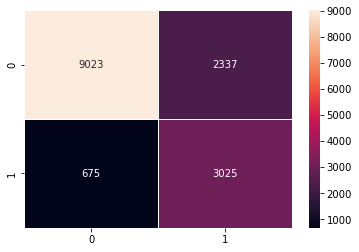

In [34]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, fmt= 'd', linewidth= 1 )

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.79      0.86     11360
        >50K       0.56      0.82      0.67      3700

    accuracy                           0.80     15060
   macro avg       0.75      0.81      0.76     15060
weighted avg       0.84      0.80      0.81     15060



# Training a model using BernoulliNB Naive Bayes classifier on the training data

In [36]:
model2 = BernoulliNB().fit(x_train,y_train)
model2

BernoulliNB()

In [37]:
y_p = model2.predict(x_train)
y_p

array([' <=50K', ' >50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [38]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_p)

0.7931346723740533

In [39]:
y_pred = model2.predict(x_test)
y_pred

array([' <=50K', ' >50K', ' >50K', ..., ' >50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [40]:
accuracy_score(y_test, y_pred)

0.7932270916334662

<AxesSubplot:>

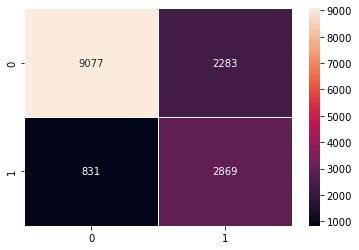

In [41]:
sns.heatmap( confusion_matrix(y_test, y_pred), annot= True, fmt= 'd', linewidth= 1 )

In [42]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.92      0.80      0.85     11360
        >50K       0.56      0.78      0.65      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.79      0.75     15060
weighted avg       0.83      0.79      0.80     15060



# Normalizing the train data using Normalizer method

In [43]:
from sklearn.preprocessing import Normalizer

In [44]:
scaler = Normalizer()
x_Train = scaler.fit_transform(Train_data.iloc[:,:-1])

In [45]:
y_train = Train_data.iloc[:,-1]

# Normalizing the test data using Normalizer method

In [46]:
x_test = scaler.fit_transform(Test_data.iloc[:,:-1])
y_test = Test_data.iloc[:,-1]

In [47]:
x_train = pd.DataFrame(x_Train, columns = Train_data.iloc[:,:-1].columns)
x_train

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,0.017933,0.005978,0.999651,0.0,0.018393,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000460,0.0,0.0
1,0.937244,0.243683,0.000000,0.0,0.243683,0.0,0.000000,0.000000,0.0,0.018745,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018745,0.0,0.0
2,0.678896,0.160791,0.000000,0.0,0.714628,0.0,0.000000,0.017866,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017866,0.0,0.0
3,0.793079,0.104746,0.000000,0.0,0.598550,0.0,0.000000,0.014964,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014964,0.0,0.0
4,0.553291,0.256885,0.000000,0.0,0.790415,0.0,0.000000,0.019760,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24291,0.508243,0.254122,0.000000,0.0,0.821008,0.0,0.019548,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019548,0.0,0.0
24292,0.721230,0.379595,0.000000,0.0,0.569392,0.0,0.000000,0.037959,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037959,0.0,0.0
24293,0.504286,0.189107,0.000000,0.0,0.840477,0.0,0.000000,0.021012,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
24294,0.550397,0.275198,0.000000,0.0,0.786281,0.0,0.000000,0.019657,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019657,0.0,0.0


# Training a model using MultinomialNB Naive Bayes classifier on the training data

In [48]:
model3 = MultinomialNB().fit(x_train,y_train)
model3

MultinomialNB()

In [49]:
y_p = model2.predict(x_train)
y_p

array([' >50K', ' >50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [50]:
accuracy_score(y_train, y_p)

0.6444682252222588

In [51]:
accuracy_score(y_test, y_pred)

0.7932270916334662

<AxesSubplot:>

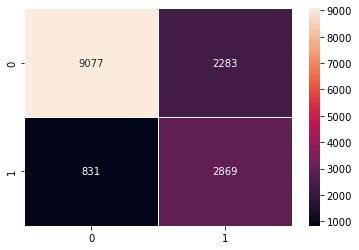

In [52]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, fmt= 'd', linewidth= 1 )

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.92      0.80      0.85     11360
        >50K       0.56      0.78      0.65      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.79      0.75     15060
weighted avg       0.83      0.79      0.80     15060

